# Initialization

In [1]:
include("./modules/OpticalCavity.jl")
include("./modules/Thermodynamics.jl")
include("./modules/Phaseonium.jl")
include("./modules/BosonicOperators.jl")
include("./modules/Measurements.jl")

using LinearAlgebra
using ProgressBars
using Plots
using LaTeXStrings
# Saving the output matrix
using Serialization
using TOML

using .OpticalCavity
using .Thermodynamics
using .Phaseonium
using .BosonicOperators
using .Measurements

include("./src/RoutineFunctions.jl")

plot_in_time (generic function with 1 method)

### Load State

In [2]:
dir = ".";
config = ""
try
    config = TOML.parsefile(dir * "/config.toml")
catch e
    println("Error reading configuration: $e")
else
    println(config["description"])
end

Error reading configuration: ErrorException("\"./config.toml\": No such file")


In [3]:
isochore_samplings = 32
adiabatic_samplings = 32
cycles = 1
total_cycle_time = 2 * (isochore_samplings + adiabatic_samplings) + 3

131

In [4]:
state = deserialize(dir * "/state_cascade_nonthermal_2photons_60cycles");

---
# Plot Evolution

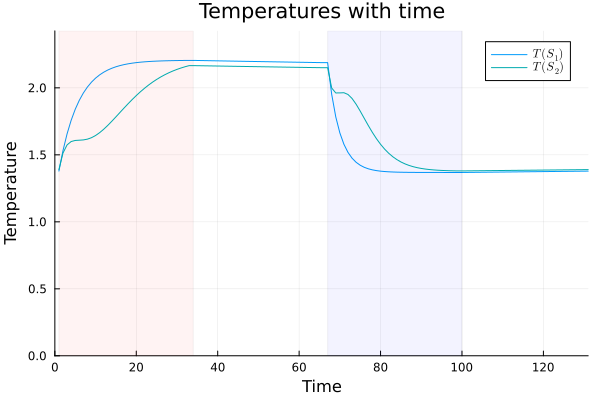

In [5]:
g1 = plot_in_time("T", state.ρ₁_evolution, state.c₁_evolution, L"T({S_1})", "Photons with time"; 
    isochore_samplings=isochore_samplings, adiabatic_samplings=adiabatic_samplings)
g2 = plot_in_time("T", state.ρ₂_evolution, state.c₂_evolution, L"T({S_2})", "Temperatures with time"; g = g1)
# hline!([1.2], color=:red, linestyle=:dash)
# hline!([0.7], color=:blue, linestyle=:dash, label=false)
xlims!(0, cycles * total_cycle_time)
# ylims!(0, 2)

In [6]:
savefig(g2, dir * "/temp_vs_time_cascade_nonthermal.png")

"G:\\UNIPA\\DOTTORATO\\PHASEONIUM\\thermo-phaseonium\\julia\\temp_vs_time_cascade_nonthermal.png"

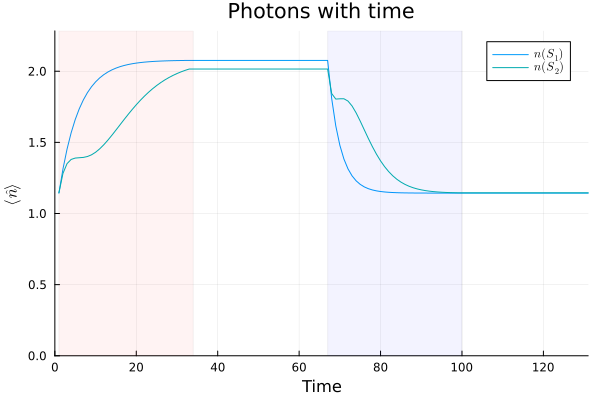

In [6]:
g1 = plot_in_time("n", state.ρ₁_evolution, state.c₁_evolution, L"n({S_1})", "Photons with time"; 
    isochore_samplings=isochore_samplings, adiabatic_samplings=adiabatic_samplings)
g2 = plot_in_time("n", state.ρ₂_evolution, state.c₂_evolution, L"n({S_2})", "Photons with time"; g = g1)
# hline!([1.2], color=:red, linestyle=:dash)
# hline!([0.7], color=:blue, linestyle=:dash, label=false)
xlims!(0, cycles * total_cycle_time)
# xlims!(0, 790)

In [8]:
savefig(g2, dir * "/n_vs_time_cascade_nonthermal.png")

"G:\\UNIPA\\DOTTORATO\\PHASEONIUM\\thermo-phaseonium\\julia\\n_vs_time_cascade_nonthermal.png"

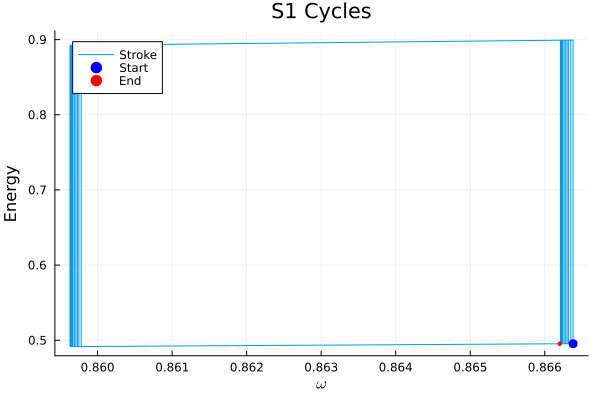

In [7]:
state_evolution = state.ρ₁_evolution # last cycle
cavity_evolution = state.c₁_evolution # last cycle
measure_and_plot("Frequency", "Energy", state_evolution, cavity_evolution, "S1 Cycles"; α=π)

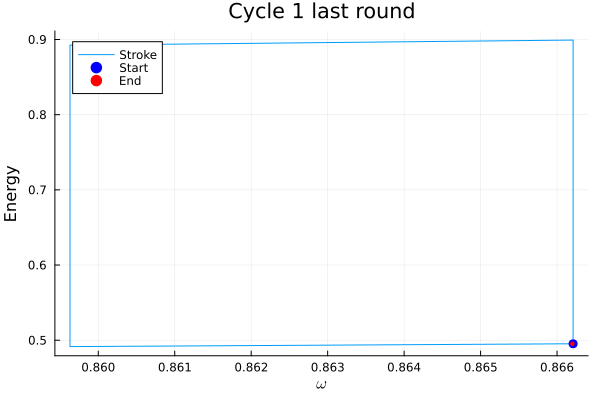

In [8]:
state_evolution = state.ρ₁_evolution[end-total_cycle_time:end] # last cycle
cavity_evolution = state.c₁_evolution[end-total_cycle_time:end] # last cycle
measure_and_plot("Frequency", "Energy", state_evolution, cavity_evolution, "Cycle 1 last round"; α=π)

In [11]:
savefig(dir * "/stable_cycle_S1_omega_vs_E.png")

"G:\\UNIPA\\DOTTORATO\\PHASEONIUM\\thermo-phaseonium\\julia\\stable_cycle_S1_omega_vs_E.png"

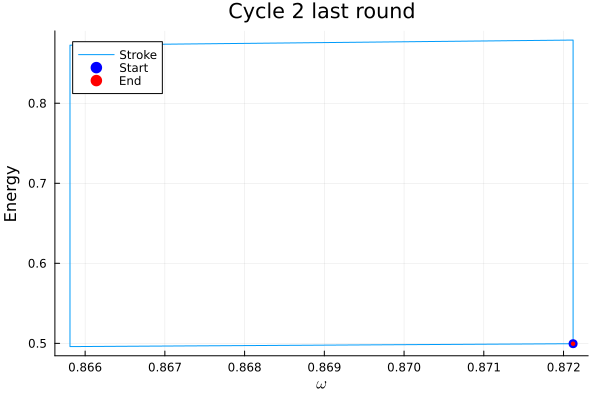

In [9]:
state_evolution = state.ρ₂_evolution[end-total_cycle_time:end] # last cycle
cavity_evolution = state.c₂_evolution[end-total_cycle_time:end] # last cycle
measure_and_plot("Frequency", "Energy", state_evolution, cavity_evolution, "Cycle 2 last round")

In [13]:
savefig(dir * "/stable_cycle_S2_omega_vs_E.png")

"G:\\UNIPA\\DOTTORATO\\PHASEONIUM\\thermo-phaseonium\\julia\\stable_cycle_S2_omega_vs_E.png"